<a href="https://colab.research.google.com/github/httpaline/PROJETO-IA/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

# DEBUG
print(IN_COLAB)

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    ds_full = '/content/drive/MyDrive/Projeto IA'


True
Mounted at /content/drive


In [2]:
import os
import random
import time
import platform
import matplotlib.pyplot as plt

import numpy as np
from sklearn import metrics
import torch
import torchvision as tv
import torch.nn.functional as F
from torch import nn, optim

from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim import lr_scheduler

from torchvision import transforms, models, datasets, utils
from torchvision import transforms, models, datasets, utils
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model.eval()

import torch
import torchvision.models as models

# Carregue o modelo ResNet18 pré-treinado
model = models.resnet18(pretrained=True)

'''# Acesse os módulos do modelo e remova a última camada totalmente conectada (fc)
model = torch.nn.Sequential(*(list(model.children())[:-1]))

# Verifique o número de camadas restantes
print(len(model))


# Carregue o modelo ResNet18 pré-treinado
model = models.resnet18(pretrained=True)

# Obtenha o número de características na última camada completamente conectada (fc)
num_features = model.fc.in_features

# Substitua a última camada completamente conectada por uma nova camada linear
model.fc = torch.nn.Linear(num_features, 5)

# Verifique a nova saída do modelo
print(model(torch.rand(1, 3, 224, 224)).size())'''


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 147MB/s]


'# Acesse os módulos do modelo e remova a última camada totalmente conectada (fc)\nmodel = torch.nn.Sequential(*(list(model.children())[:-1]))\n\n# Verifique o número de camadas restantes\nprint(len(model))\n\n\n# Carregue o modelo ResNet18 pré-treinado\nmodel = models.resnet18(pretrained=True)\n\n# Obtenha o número de características na última camada completamente conectada (fc)\nnum_features = model.fc.in_features\n\n# Substitua a última camada completamente conectada por uma nova camada linear\nmodel.fc = torch.nn.Linear(num_features, 5)\n\n# Verifique a nova saída do modelo\nprint(model(torch.rand(1, 3, 224, 224)).size())'

In [3]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [4]:
# Verifica se a GPU está disponível
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('\nDevice: {0}'.format(DEVICE))


Device: cuda


In [5]:
!nvidia-smi

Fri Dec  8 13:33:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
if IN_COLAB:
    ds_path = '/content/drive/MyDrive/Projeto IA'
else:
    ds_path = '/content/drive/MyDrive/Projeto IA/data'


In [7]:
# Número de classes
num_classes = 2

class_name = [ 'stroke', 'normal']


# Tamanho do lote (mini-batch)
batch_size = 32

# Taxa de aprendizado
lr = 0.0001

# Mommentum
mm = 0.5

# Número de épocas
epochs = 30


In [8]:
# Treinamento
data_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    ### transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    # Média e desvio padrão do ImageNet.
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

full_dataset = datasets.ImageFolder(ds_path, transform=data_transforms)

In [10]:
import torch
from torch.utils.data import random_split

# Tamanhos dos conjuntos
dataset_size = len(full_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

# Divisão aleatória
train_dataset, val_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, val_size, test_size]
)

# Número de imagens em cada dataset
train_dataset_size = len(train_dataset)
val_dataset_size = len(val_dataset)
test_dataset_size = len(test_dataset)

# Imprimir tamanhos para verificação
print("Tamanho do conjunto de treinamento:", train_dataset_size)
print("Tamanho do conjunto de validação:", val_dataset_size)
print("Tamanho do conjunto de teste:", test_dataset_size)

# Definindo os dataloaders
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size)
val_dataloader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size)

Tamanho do conjunto de treinamento: 1619
Tamanho do conjunto de validação: 347
Tamanho do conjunto de teste: 348


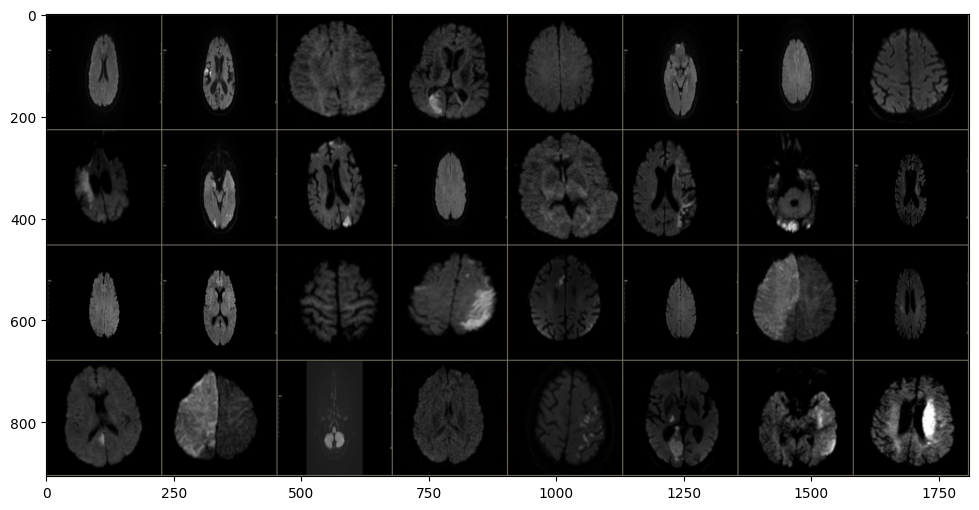

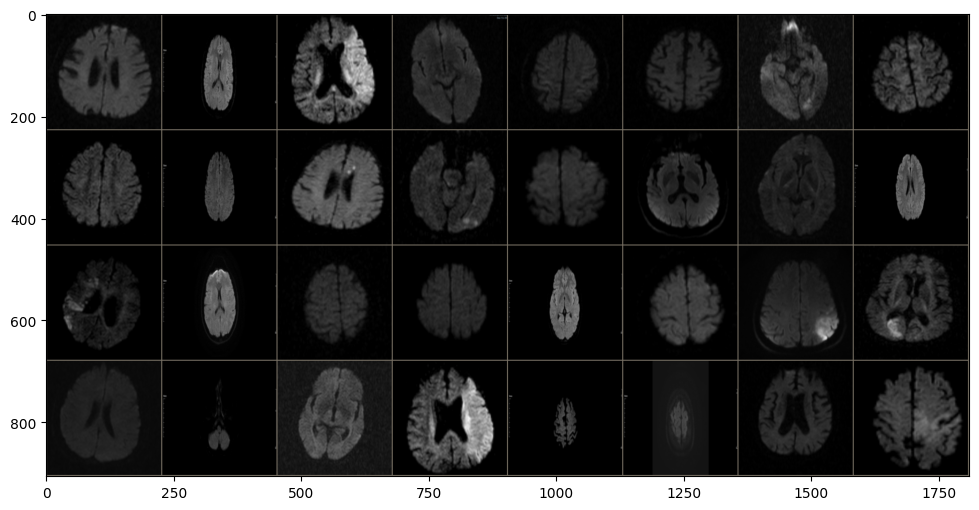

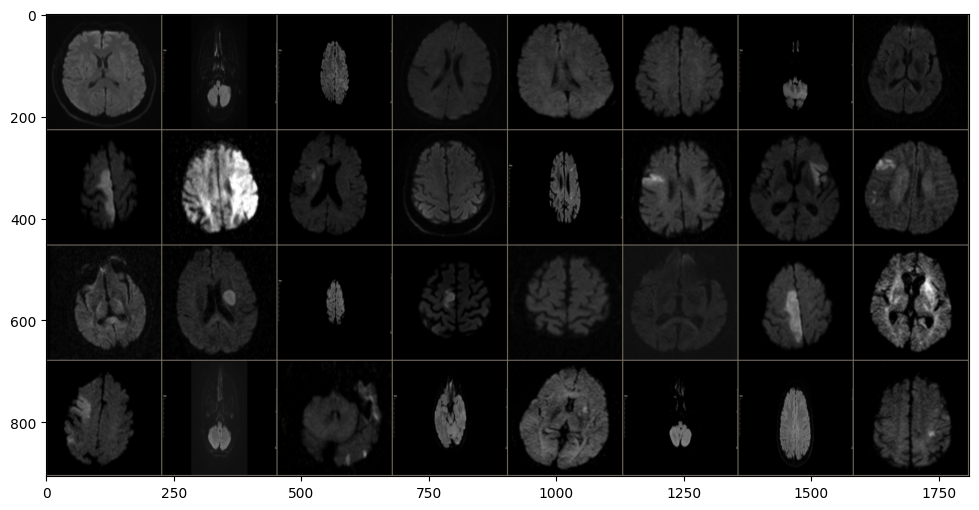

In [ ]:
def show_transformed_image(image):
    # Unnormalize all channels
    for t, m, s in zip(image, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]): # (ImageNet weights)
        t.mul_(s).add_(m)

    np_image = image.numpy()

    plt.figure(figsize=(20, 6))  # Ajuste o tamanho da figura conforme necessário
    plt.imshow(np.transpose(np_image, (1, 2, 0)))

# Visualizar apenas 3 imagens do lote
dataloader_vis = torch.utils.data.DataLoader(dataset=full_dataset, shuffle=True, batch_size=32)
items = iter(dataloader_vis)
for i in range(3):
    image, label = next(items)
    show_transformed_image(utils.make_grid(image))
    plt.show()


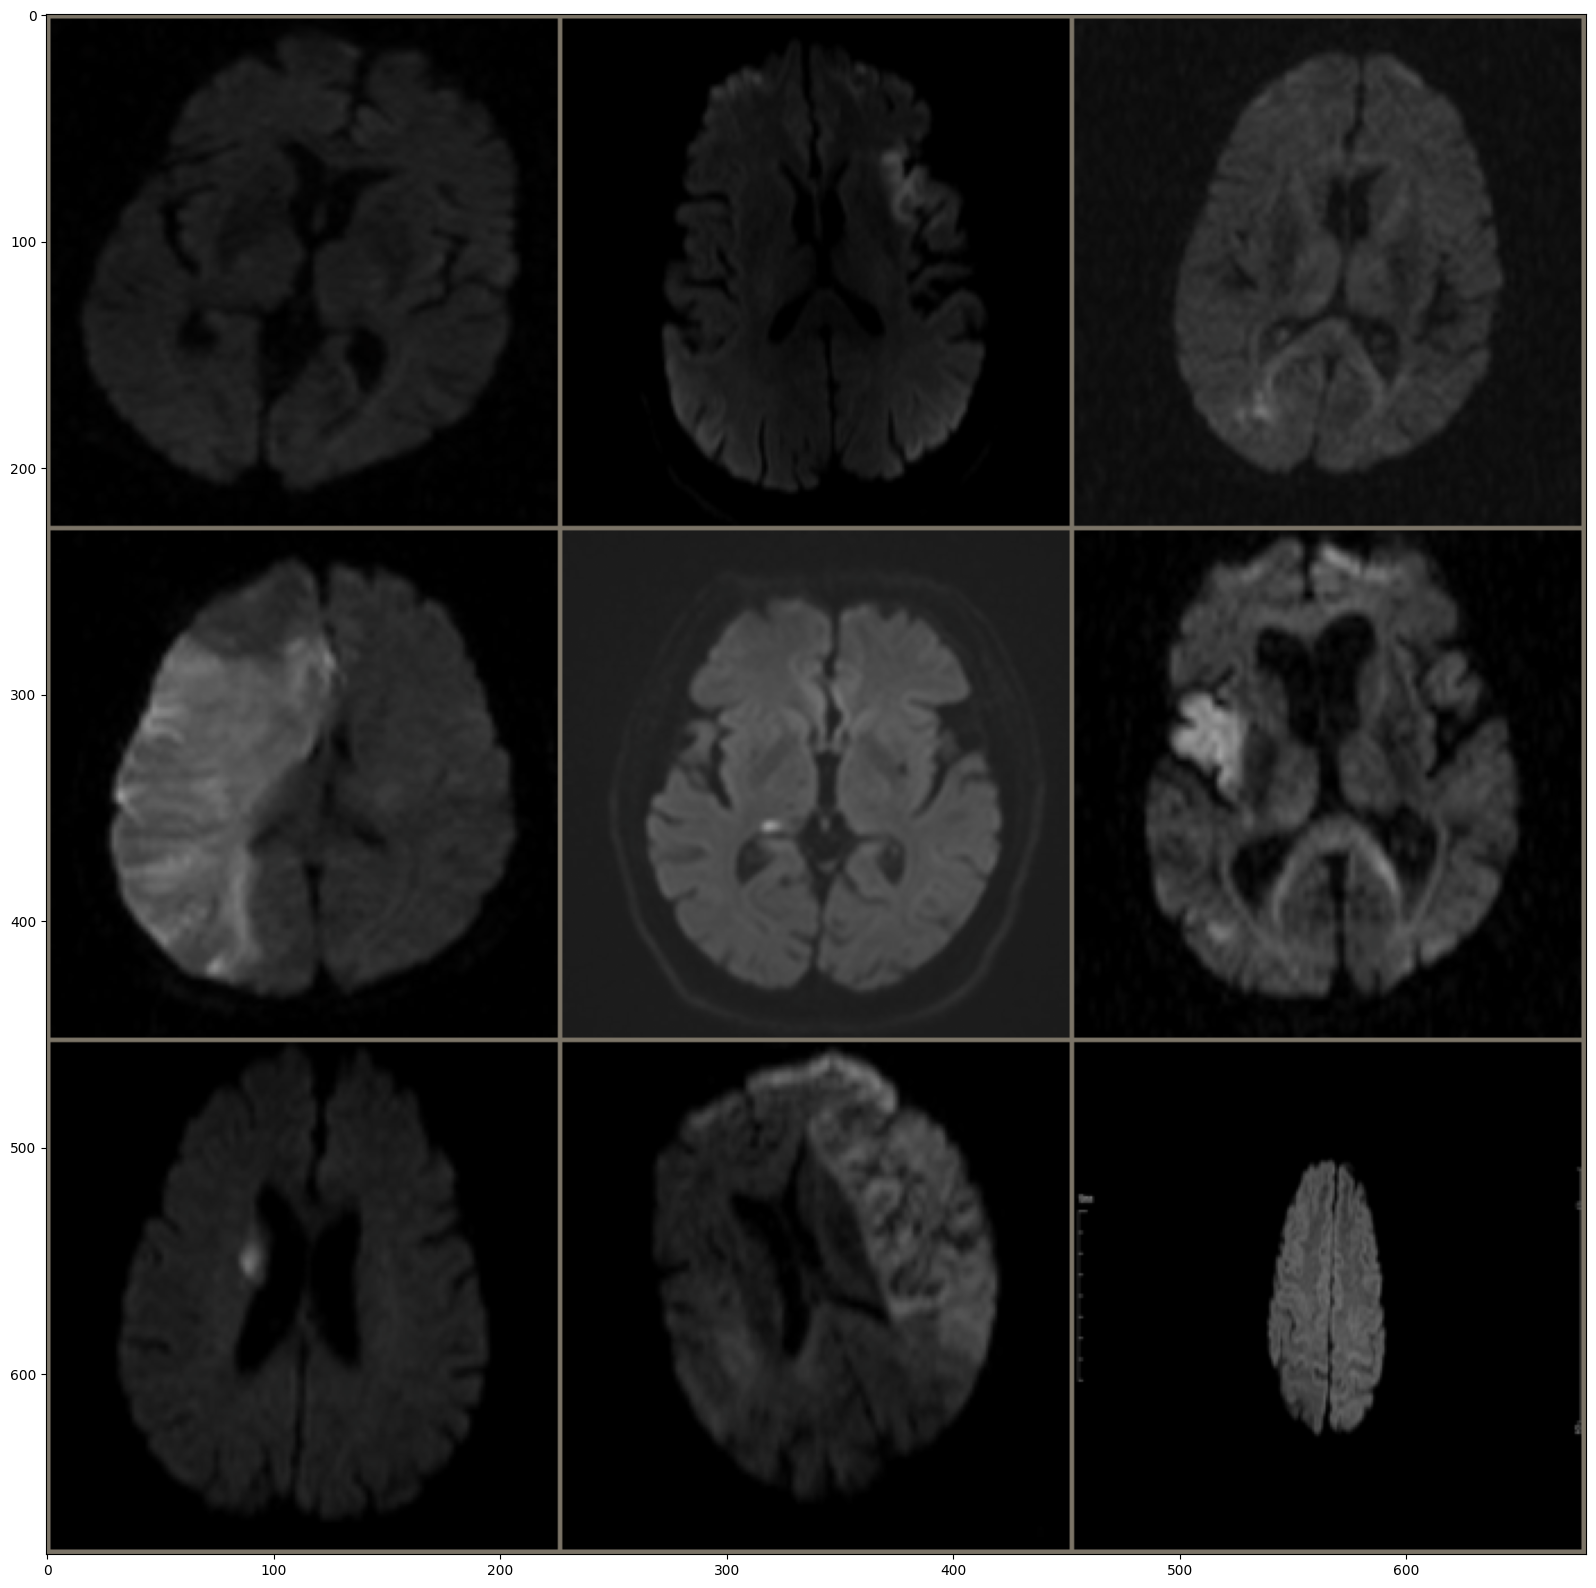

In [ ]:
def show_transformed_image(image):
    # Unnormalize all channels
    ### for t, m, s in zip(np_image, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
    for t, m, s in zip(image, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]): # (ImageNet weights)
        t.mul_(s).add_(m)

    np_image = image.numpy()

    plt.figure(figsize=(20, 20))
    plt.imshow(np.transpose(np_image, (1, 2, 0)))

# Visualizar 'batch_size' imagens
dataloader_vis = torch.utils.data.DataLoader(dataset=full_dataset, shuffle=True, batch_size=32)
items = iter(dataloader_vis)
for image, label in items:
    pass

show_transformed_image(utils.make_grid(image[:9], nrow=3))

In [11]:
# Carrega o modelo ResNet pré-treinado
model_resnet = models.resnet18(pretrained=True)

# Desativa o treinamento dos parâmetros existentes
for param in model_resnet.parameters():
    param.requires_grad = False

# Altera o número de neurônios na camada de saída
num_classes = 2  # Substitua pelo número correto de classes do seu problema
model_resnet.fc = nn.Linear(model_resnet.fc.in_features, num_classes)

In [12]:
# Simple net
### model = Net(3, 5)

# Pretrainned
modelresnet = model_resnet

In [13]:
# Envia o modelo para a GPU
if DEVICE.type == 'cuda':
    model = model.cuda() # Cuda

# Imprime o modelo
print(str(model))

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
# Função de perda
criterion = nn.CrossEntropyLoss()

# Otimizador
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mm)

In [15]:
 # Tempo total do treinamento (treinamento e validação)
time_total_start = time.time()

# Lista das perdas (loss) e acurácias (accuracy) de trino para cada época.
train_loss_list = []
train_acc_list = []

# Lista das perdas (loss) e acurácias (accuracy) de validação para cada época.
val_loss_list = []
val_acc_list = []

modelresnet = modelresnet.to(DEVICE)

for epoch in range(epochs):
    # TREINAMENTO
    # =========================================================================
    # Inicia contagem de tempo da época
    time_epoch_start = time.time()

    # Habilita o modelo para o modo de treino
    modelresnet.train()

    # Perda (loss) nesta época
    loss_epoch_train = 0.0
    # Amostras classificadas corretamente nesta época
    num_hits_epoch_train = 0

    # Iterate along the batches of the TRAINING SET
    for inputs, labels in train_dataloader:
        if DEVICE.type == 'cuda':
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)

        # Zera os parametros do gradiente
        optimizer.zero_grad()

        # FORWARD
        # ------>
        # Habilita o cálculo do gradiente
        torch.set_grad_enabled(True)

        # Saída do modelo para o lote
        outputs = modelresnet(inputs)

        # 'outputs' está em porcentagens. Tomar os maximos como resposta.
        preds = torch.argmax(outputs, dim=1).float()

        # Calcula a perda (loss)
        loss = criterion(outputs, labels)

        # BACKWARD
        # <-------
        loss.backward()

        # Atualiza os parâmetros da rede
        optimizer.step()

        # Atualiza a perda da época
        loss_epoch_train += float(loss.item()) * inputs.size(0)

        # Atualiza o número de amostras classificadas corretamente na época.
        num_hits_epoch_train += torch.sum(preds == labels.data)

    # Perda desta época
    train_loss = loss_epoch_train / train_size
    # Acurácia desta época
    train_acc = float(num_hits_epoch_train.double() / train_size)

    # Store loss and accuracy in lists
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)

    # VALIDAÇÃO
    # =========================================================================
    modelresnet.eval()

    # Pego o numero de perda e o numero de acertos
    loss_epoch_val = 0.0 # Atual perda
    num_hits_epoch_val = 0 # Numero de itens corretos

    # Iterate along the batches of the VALIDATION SET
    for inputs, labels in val_dataloader:

        if DEVICE.type == 'cuda':
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)

        # Zera os parametros do gradiente
        optimizer.zero_grad()

        # Desabilita o cálculo do gradiente durante a validação.
        torch.set_grad_enabled(False)

        # Gero um tensor cujas linhas representam o tamanho do "batch" do input
        outputs = modelresnet(inputs)

        # Retorna a maior predicao.
        #### _, preds = torch.max(outputs, 1)
        preds = torch.argmax(outputs, dim=1).float()

        # Calcula a perda (loss)
        loss = criterion(outputs, labels)

        # Atualiza a perda da época
        loss_epoch_val += float(loss.item()) * inputs.size(0)
        # # Atualiza os acertos da época
        num_hits_epoch_val += torch.sum(preds == labels.data)

    # Ajusta o learning rate
    ### scheduler.step()

    # Perda e acuracia do conjunto de validacao para esta época
    val_loss = loss_epoch_val / val_size
    val_acc = float(num_hits_epoch_val.double() / val_size)

    # Store loss and accuracy in lists
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

    # Tempo total desta época
    time_epoch = time.time() - time_epoch_start

    # PRINTING
    # --------
    print('Epoch {}/{} - TRAIN Loss: {:.4f} TRAIN Acc: {:.4f} - VAL. Loss: {:.4f} VAL. Acc: {:.4f} ({:.4f} seconds)'.format(epoch, epochs - 1, train_loss, train_acc, val_loss, val_acc, time_epoch))

# Tempo total do treinamento
time_total_train = time.time() - time_total_start

# PRINTING

print('\nTreinamento finalizado. ({0}m and {1}s)'.format(int(time_total_train // 60), int(time_total_train % 60)))

Epoch 0/29 - TRAIN Loss: 0.3776 TRAIN Acc: 0.9524 - VAL. Loss: 0.5137 VAL. Acc: 0.7839 (282.0820 seconds)
Epoch 1/29 - TRAIN Loss: 0.3776 TRAIN Acc: 0.9524 - VAL. Loss: 0.3971 VAL. Acc: 0.9337 (27.9225 seconds)
Epoch 2/29 - TRAIN Loss: 0.3776 TRAIN Acc: 0.9524 - VAL. Loss: 0.3849 VAL. Acc: 0.9452 (27.7798 seconds)
Epoch 3/29 - TRAIN Loss: 0.3776 TRAIN Acc: 0.9524 - VAL. Loss: 0.3849 VAL. Acc: 0.9452 (26.7590 seconds)
Epoch 4/29 - TRAIN Loss: 0.3776 TRAIN Acc: 0.9524 - VAL. Loss: 0.3849 VAL. Acc: 0.9452 (27.1167 seconds)
Epoch 5/29 - TRAIN Loss: 0.3776 TRAIN Acc: 0.9524 - VAL. Loss: 0.3849 VAL. Acc: 0.9452 (27.6046 seconds)
Epoch 6/29 - TRAIN Loss: 0.3776 TRAIN Acc: 0.9524 - VAL. Loss: 0.3849 VAL. Acc: 0.9452 (27.5685 seconds)
Epoch 7/29 - TRAIN Loss: 0.3776 TRAIN Acc: 0.9524 - VAL. Loss: 0.3849 VAL. Acc: 0.9452 (26.2111 seconds)
Epoch 8/29 - TRAIN Loss: 0.3776 TRAIN Acc: 0.9524 - VAL. Loss: 0.3849 VAL. Acc: 0.9452 (27.7331 seconds)
Epoch 9/29 - TRAIN Loss: 0.3776 TRAIN Acc: 0.9524 - VA

In [16]:
# Lista com as classes reais e classes preditas
true_val_list = []
pred_val_list = []
# Lista com as probabilidades
prob_val_list = []

# Iterate along the batches of the TEST SET
for i, (img_list, labelList) in enumerate(test_dataloader):

    if DEVICE.type == 'cuda':
        img_list = img_list.to(DEVICE)
        labelList = labelList.to(DEVICE)

    # Desabilita o cálculo do gradiente durante validação e testes.
    torch.set_grad_enabled(False)

    # -----> FORWARD
    # Saída do modelo
    outputs = model(img_list)

    # Predição
    ### _, preds = torch.max(output, 1)
    preds = torch.argmax(outputs, dim=1)

    # Calcula probabilidades
    # https://discuss.pytorch.org/t/obtain-probabilities-from-cross-entropy-loss/157259
    outputs_prob = nn.functional.softmax(outputs, dim=1)
    prob_val_batch = np.asarray(outputs_prob.cpu())

    # Classes reais true) e classes preditas (pred) para este lote.
    if DEVICE.type == 'cuda':
        true_val_batch = np.asarray(labelList.cpu())
        pred_val_batch = np.asarray(preds.cpu())

    # Itera ao longo do lote
    for i in range(0, len(pred_val_batch)):
        true_val_list.append(true_val_batch[i])
        pred_val_list.append(pred_val_batch[i])

        prob_val_list.append(prob_val_batch[i])

In [17]:
# Lista com as classes reais e classes preditas
true_val_list = []
pred_val_list = []
# Lista com as probabilidades
prob_val_list = []

# Iterate along the batches of the VALIDATION SET
for i, (img_list, labelList) in enumerate(val_dataloader):

    if DEVICE.type == 'cuda':
        img_list = img_list.to(DEVICE)
        labelList = labelList.to(DEVICE)

    # Desabilita o cálculo do gradiente durante validação e testes.
    torch.set_grad_enabled(False)

    # -----> FORWARD
    # Saída do modelo
    outputs = model(img_list)

    # Predição
    ### _, preds = torch.max(output, 1)
    preds = torch.argmax(outputs, dim=1)

    # Calcula probabilidades
    # https://discuss.pytorch.org/t/obtain-probabilities-from-cross-entropy-loss/157259
    outputs_prob = nn.functional.softmax(outputs, dim=1)
    prob_val_batch = np.asarray(outputs_prob.cpu())

    # Classes reais true) e classes preditas (pred) para este lote.
    if DEVICE.type == 'cuda':
        true_val_batch = np.asarray(labelList.cpu())
        pred_val_batch = np.asarray(preds.cpu())

    # Itera ao longo do lote
    for i in range(0, len(pred_val_batch)):
        true_val_list.append(true_val_batch[i])
        pred_val_list.append(pred_val_batch[i])

        prob_val_list.append(prob_val_batch[i])

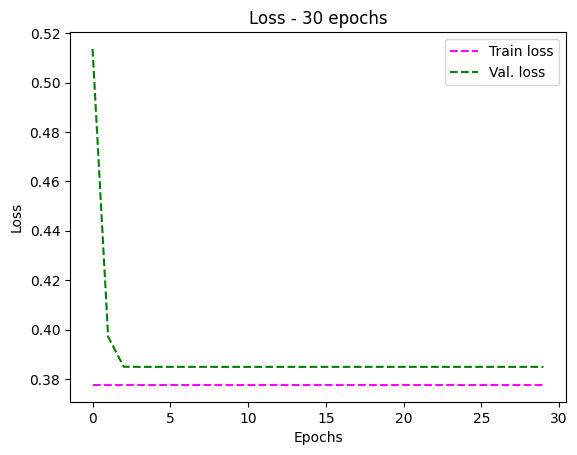

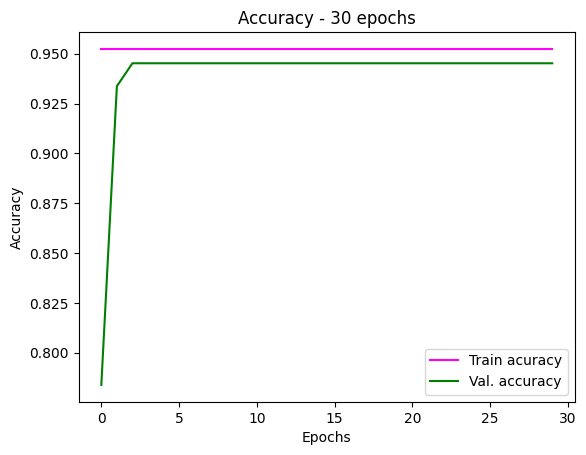

In [18]:
# Lista com os indices das épocas. [0, 1, ... num_epochs - 1]
epochs_list = []
for i in range(len(train_loss_list)):
    epochs_list.append(i)

# Titulo - Loss and accuracy chart
loss_title = 'Loss - ' + str(epochs) + ' epochs'
acc_title = 'Accuracy - ' + str(epochs) + ' epochs'

# Plot - Loss
plt.figure()
plt.title(loss_title)
plt.plot(epochs_list, train_loss_list, c='magenta' ,ls='--', label='Train loss', fillstyle='none')
plt.plot(epochs_list, val_loss_list, c='green' ,ls='--', label='Val. loss', fillstyle='none')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.savefig('curva_perda_resnet18.pdf')

# Plot - Accuracy
plt.figure()
plt.title(acc_title)
plt.plot(epochs_list, train_acc_list, c='magenta' ,ls='-', label='Train acuracy', fillstyle='none')
plt.plot(epochs_list, val_acc_list, c='green' ,ls='-', label='Val. accuracy', fillstyle='none')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.savefig('curva_acuracia_resnet18.pdf')